<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">GridSearch & Corss-Validation</h3>
    <h4 align="center"><a href="https://github.com/AliBinary">Ali Ghanbari</a></h5>
</div>

# Topics:

- [ ] What is a Hyperparameter
- [ ] GridSearch
- [ ] Cross-Validatoin
- [ ] how to use the Grid Search to obtain optimal hyperparameters for a machine learning model.

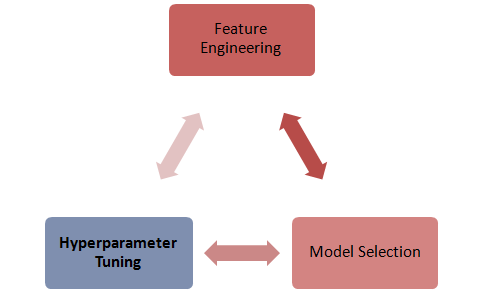

# What is Cross-Validation?

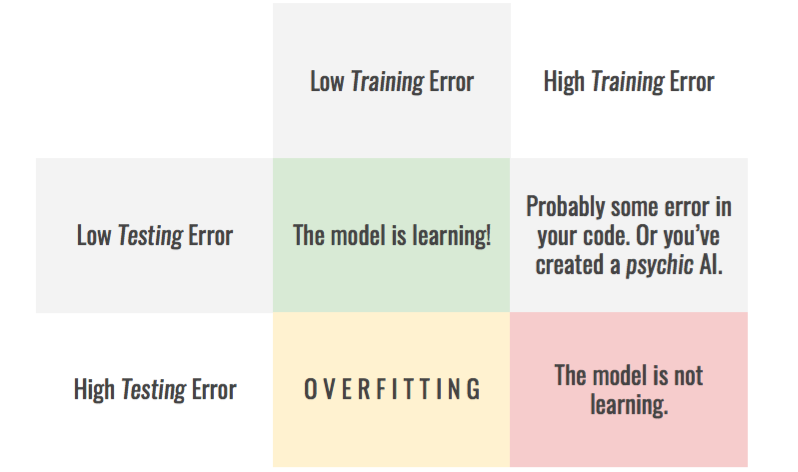

*Cross-Validation* is a validation technique designed to evaluate and assess how the results of statistical analysis (model) will generalize to an independent dataset. Cross-Validation is primarily used in scenarios where prediction is the main aim, and the user wants to estimate how well and accurately a predictive model will perform in real-world situations.

Cross-Validation seeks to define a dataset by testing the model in the training phase to help minimize problems like overfitting and underfitting. However, you must remember that both the validation and the training set must be extracted from the same distribution, or else it would lead to problems in the validation phase.

### Benefits of Cross-Validation

* It helps evaluate the quality of your model.
* It helps to reduce/avoid problems of overfitting and underfitting.
* It lets you select the model that will deliver the best performance on unseen data.

## Hold-out (Train-Test-Split) vs. Cross-validation

Cross-validation is usually the preferred method because it gives your model the opportunity to train on multiple train-test splits. This gives you a better indication of how well your model will perform on unseen data. Hold-out, on the other hand, is dependent on just one train-test split. That makes the hold-out method score dependent on how the data is split into train and test sets.

The hold-out method is good to use when you have a very large dataset, you’re on a time crunch, or you are starting to build an initial model in your data science project. Keep in mind that because cross-validation uses multiple train-test splits, it takes more computational power and time to run than using the holdout method.

## Cross-Validation: Different Validation Strategies

1. Validation set 
2. Train/Test split 
3. K-fold 
4. Leave one out

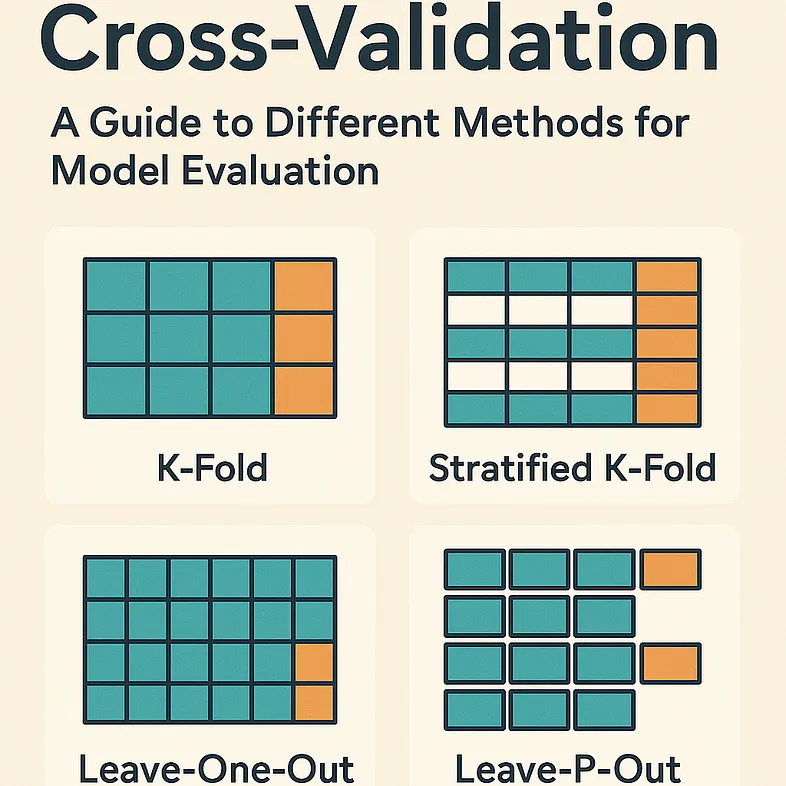

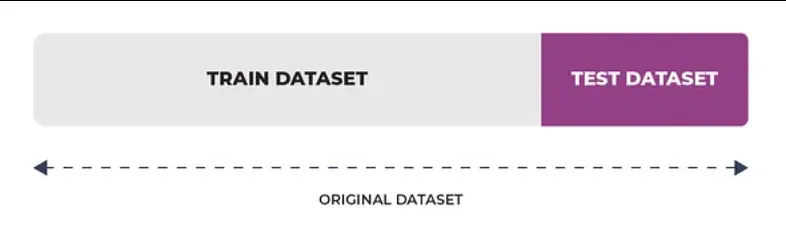

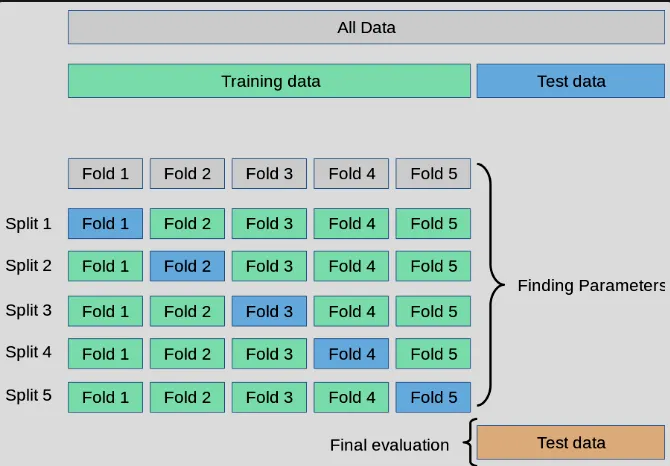

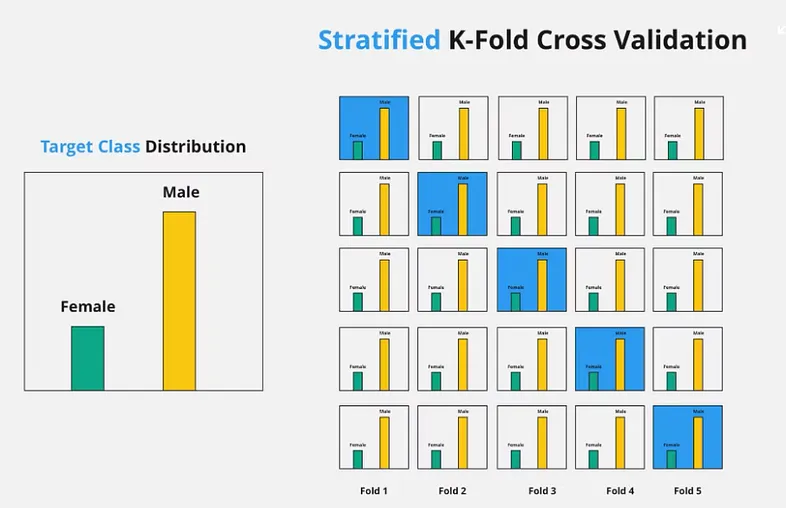

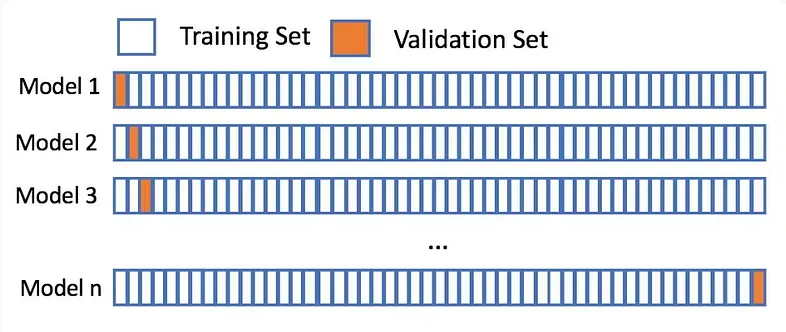

## Import Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Import Dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [7]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernel SVM model on the Training set

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

In [10]:
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Making the Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [12]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


In [13]:
accuracy_score(y_test, y_pred)

0.93

## Applying k-Fold Cross Validation

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [16]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


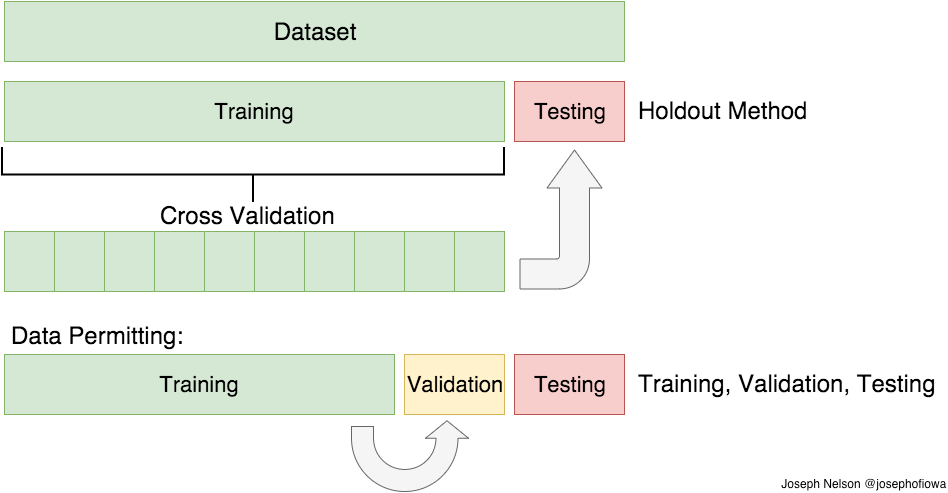

## Applying Grid Search to find the best model and the best parameters

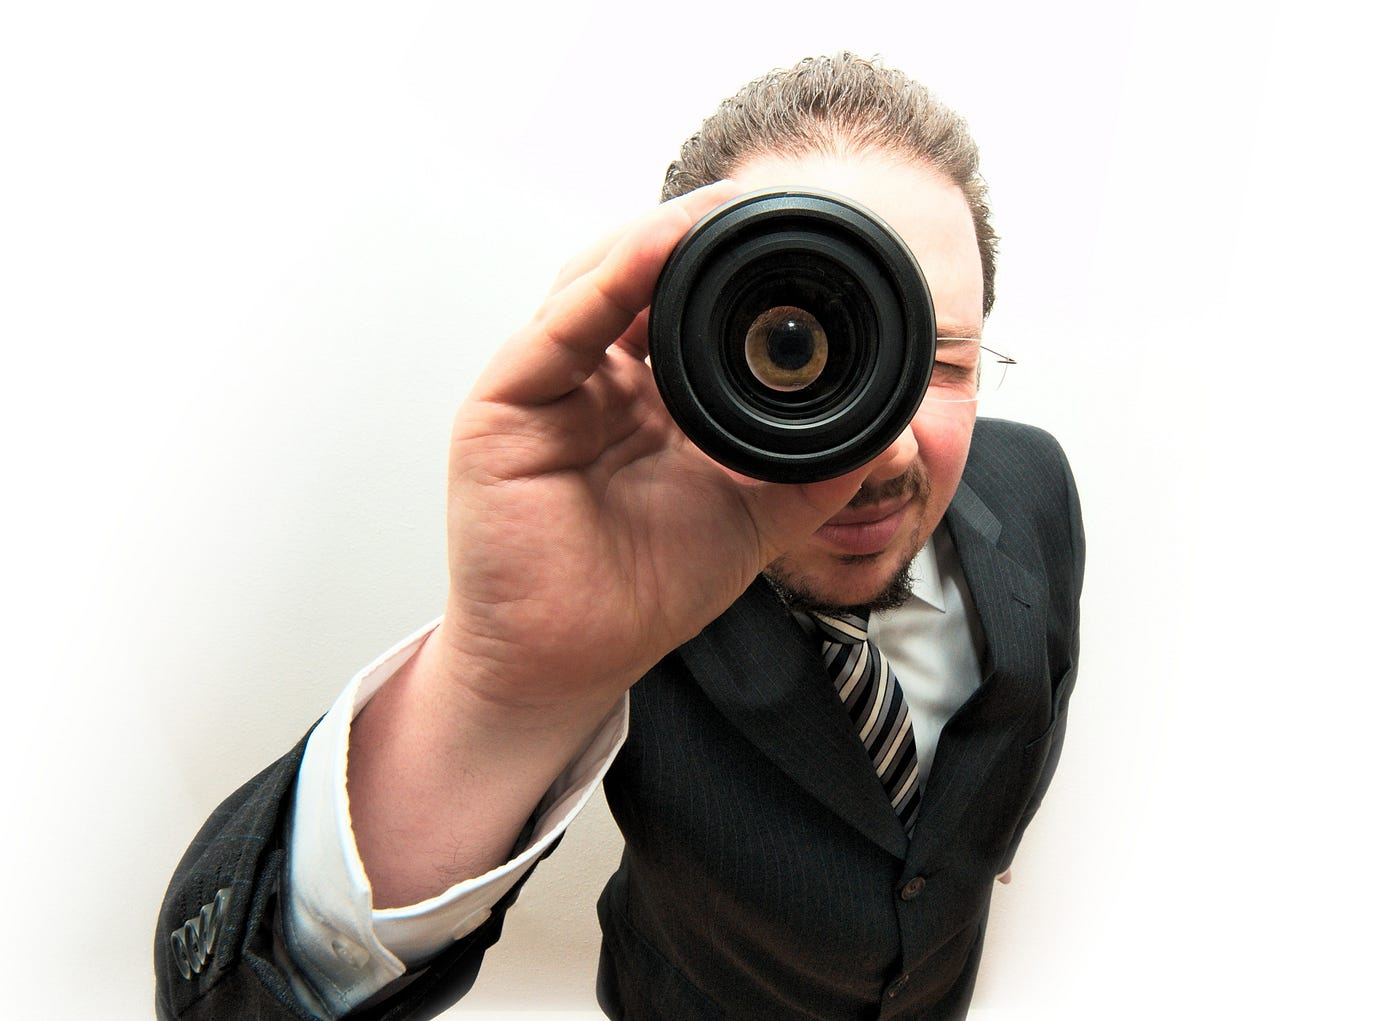

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [19]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [20]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [21]:
best_accuracy = grid_search.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))

Best Accuracy: 90.67 %


In [22]:
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Parameters: {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


### We will now be presented with the optimal values of the hyperparameters.
